In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
    BaggingClassifier,
    AdaBoostClassifier
)
from sklearn.multiclass import OneVsRestClassifier

# Data preprocessing
from sklearn import preprocessing
from scipy.stats import zscore
from numpy import interp  # ✅ Correction ici
from itertools import cycle

# Deep Learning
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import (
    Dense, Dropout, Activation, Embedding,
    LSTM, SimpleRNN, GRU, Bidirectional,
    BatchNormalization, Convolution1D, MaxPooling1D,
    Reshape, GlobalAveragePooling1D
)
from tensorflow.keras.utils import get_file, plot_model
from tensorflow.keras.callbacks import EarlyStopping

# Debugging versions
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Python version:", sys.version)
print("Scikit-learn version:", sklearn.__version__)


Pandas version: 2.2.3
NumPy version: 2.2.2
Python version: 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
Scikit-learn version: 1.6.1


In [2]:
#Loading training set into dataframe
df = pd.read_csv('KDDTrain+.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
#Loading testing set into dataframe
qp = pd.read_csv('KDDTest+.txt', header=None)
qp.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [4]:
#Reset column names for training set
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
#Reset column names for testing set
qp.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
qp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
df.shape


(125973, 43)

In [8]:
qp.shape


(22544, 43)

In [9]:
#  Afficher la liste des colonnes
lst_names = df.columns
print(" Liste des colonnes :")
for i, col in enumerate(lst_names, start=1):
    print(f"{i}. {col}")

#  Afficher le nombre total de colonnes
print("\nNombre total de colonnes :", len(lst_names))

 Liste des colonnes :
1. duration
2. protocol_type
3. service
4. flag
5. src_bytes
6. dst_bytes
7. land
8. wrong_fragment
9. urgent
10. hot
11. num_failed_logins
12. logged_in
13. num_compromised
14. root_shell
15. su_attempted
16. num_root
17. num_file_creations
18. num_shells
19. num_access_files
20. num_outbound_cmds
21. is_host_login
22. is_guest_login
23. count
24. srv_count
25. serror_rate
26. srv_serror_rate
27. rerror_rate
28. srv_rerror_rate
29. same_srv_rate
30. diff_srv_rate
31. srv_diff_host_rate
32. dst_host_count
33. dst_host_srv_count
34. dst_host_same_srv_rate
35. dst_host_diff_srv_rate
36. dst_host_same_src_port_rate
37. dst_host_srv_diff_host_rate
38. dst_host_serror_rate
39. dst_host_srv_serror_rate
40. dst_host_rerror_rate
41. dst_host_srv_rerror_rate
42. subclass
43. difficulty_level

Nombre total de colonnes : 43


1️⃣ Distribution de la variable cible

In [10]:
# Distribution de la variable cible (subclass)
print("\n Distribution de la variable cible 'subclass' :")
print(df['subclass'].value_counts())

#  Aperçu rapide des types de données
print("\n Types de données par colonne :")
print(df.dtypes)


 Distribution de la variable cible 'subclass' :
subclass
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

 Types de données par colonne :
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   in

✅ Note : Le dataset est déséquilibré. Certaines attaques sont très rares (ex. spy = 2).

Cela peut poser problème pour l’entraînement d’un modèle si tu ne gères pas l’équilibre.

Observation :

Les colonnes catégorielles devront être encodées avant de passer dans un modèle ML/DL.

Les colonnes numériques pourront être normalisées (min-max ou z-score).

**1️⃣ Audit rapide (Quick Audit)**


In [11]:
# Types de colonnes et nombre de valeurs non nulles
df.info()
qp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:

# Statistiques descriptives des colonnes numériques
pd.set_option('display.max_columns', None)  # Montre toutes les colonnes
pd.set_option('display.width', 200)         # Largeur d'affichage suffisante

df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
# Nombre de valeurs uniques par colonne
df.nunique()


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [14]:
qp.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

Observations sur ton dataset

Certaines colonnes ont des écarts énormes, par ex. src_bytes :

mean ≈ 45 566

max ≈ 1.38 × 10^9
→ Ce genre de colonne doit être normalisé pour le modèle DL.

Certaines colonnes ont beaucoup de zéros :

duration, wrong_fragment, urgent, num_failed_logins, etc.
→ Cela indique des valeurs peu fréquentes ou rares.

Les colonnes comme dst_host_same_srv_rate, srv_serror_rate etc. sont déjà comprises entre 0 et 1, donc elles sont prêtes pour le DL.

In [15]:
#Distribution  subclass
print("Les différentes classes dans 'subclass' et leurs fréquences :\n")
print(df['subclass'].value_counts())



Les différentes classes dans 'subclass' et leurs fréquences :

subclass
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


Ce code affiche la répartition des différentes classes présentes dans la colonne subclass et montre que les données sont fortement déséquilibrées entre les classes (beaucoup de normal et neptune, très peu pour d’autres attaques rares).

In [16]:
# Fréquence des valeurs pour les variables catégorielles
df['protocol_type'].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

**2️⃣ Qualité des données (Data Quality)**


In [17]:
# Valeurs manquantes
df.isna().sum()



duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [18]:
# Lignes dupliquées
df.duplicated().sum()

np.int64(0)

In [19]:
# Dropping the last column of the training set
df = df.drop('difficulty_level', axis=1)  # axis=1 يعني عمود
df.shape


(125973, 42)

In [20]:
#Dropping the last columns of testing set
qp = qp.drop('difficulty_level', axis=1)
qp.shape

(22544, 42)

In [21]:
df.isnull().values.any()

np.False_

In [22]:
qp.isnull().values.any()

np.False_

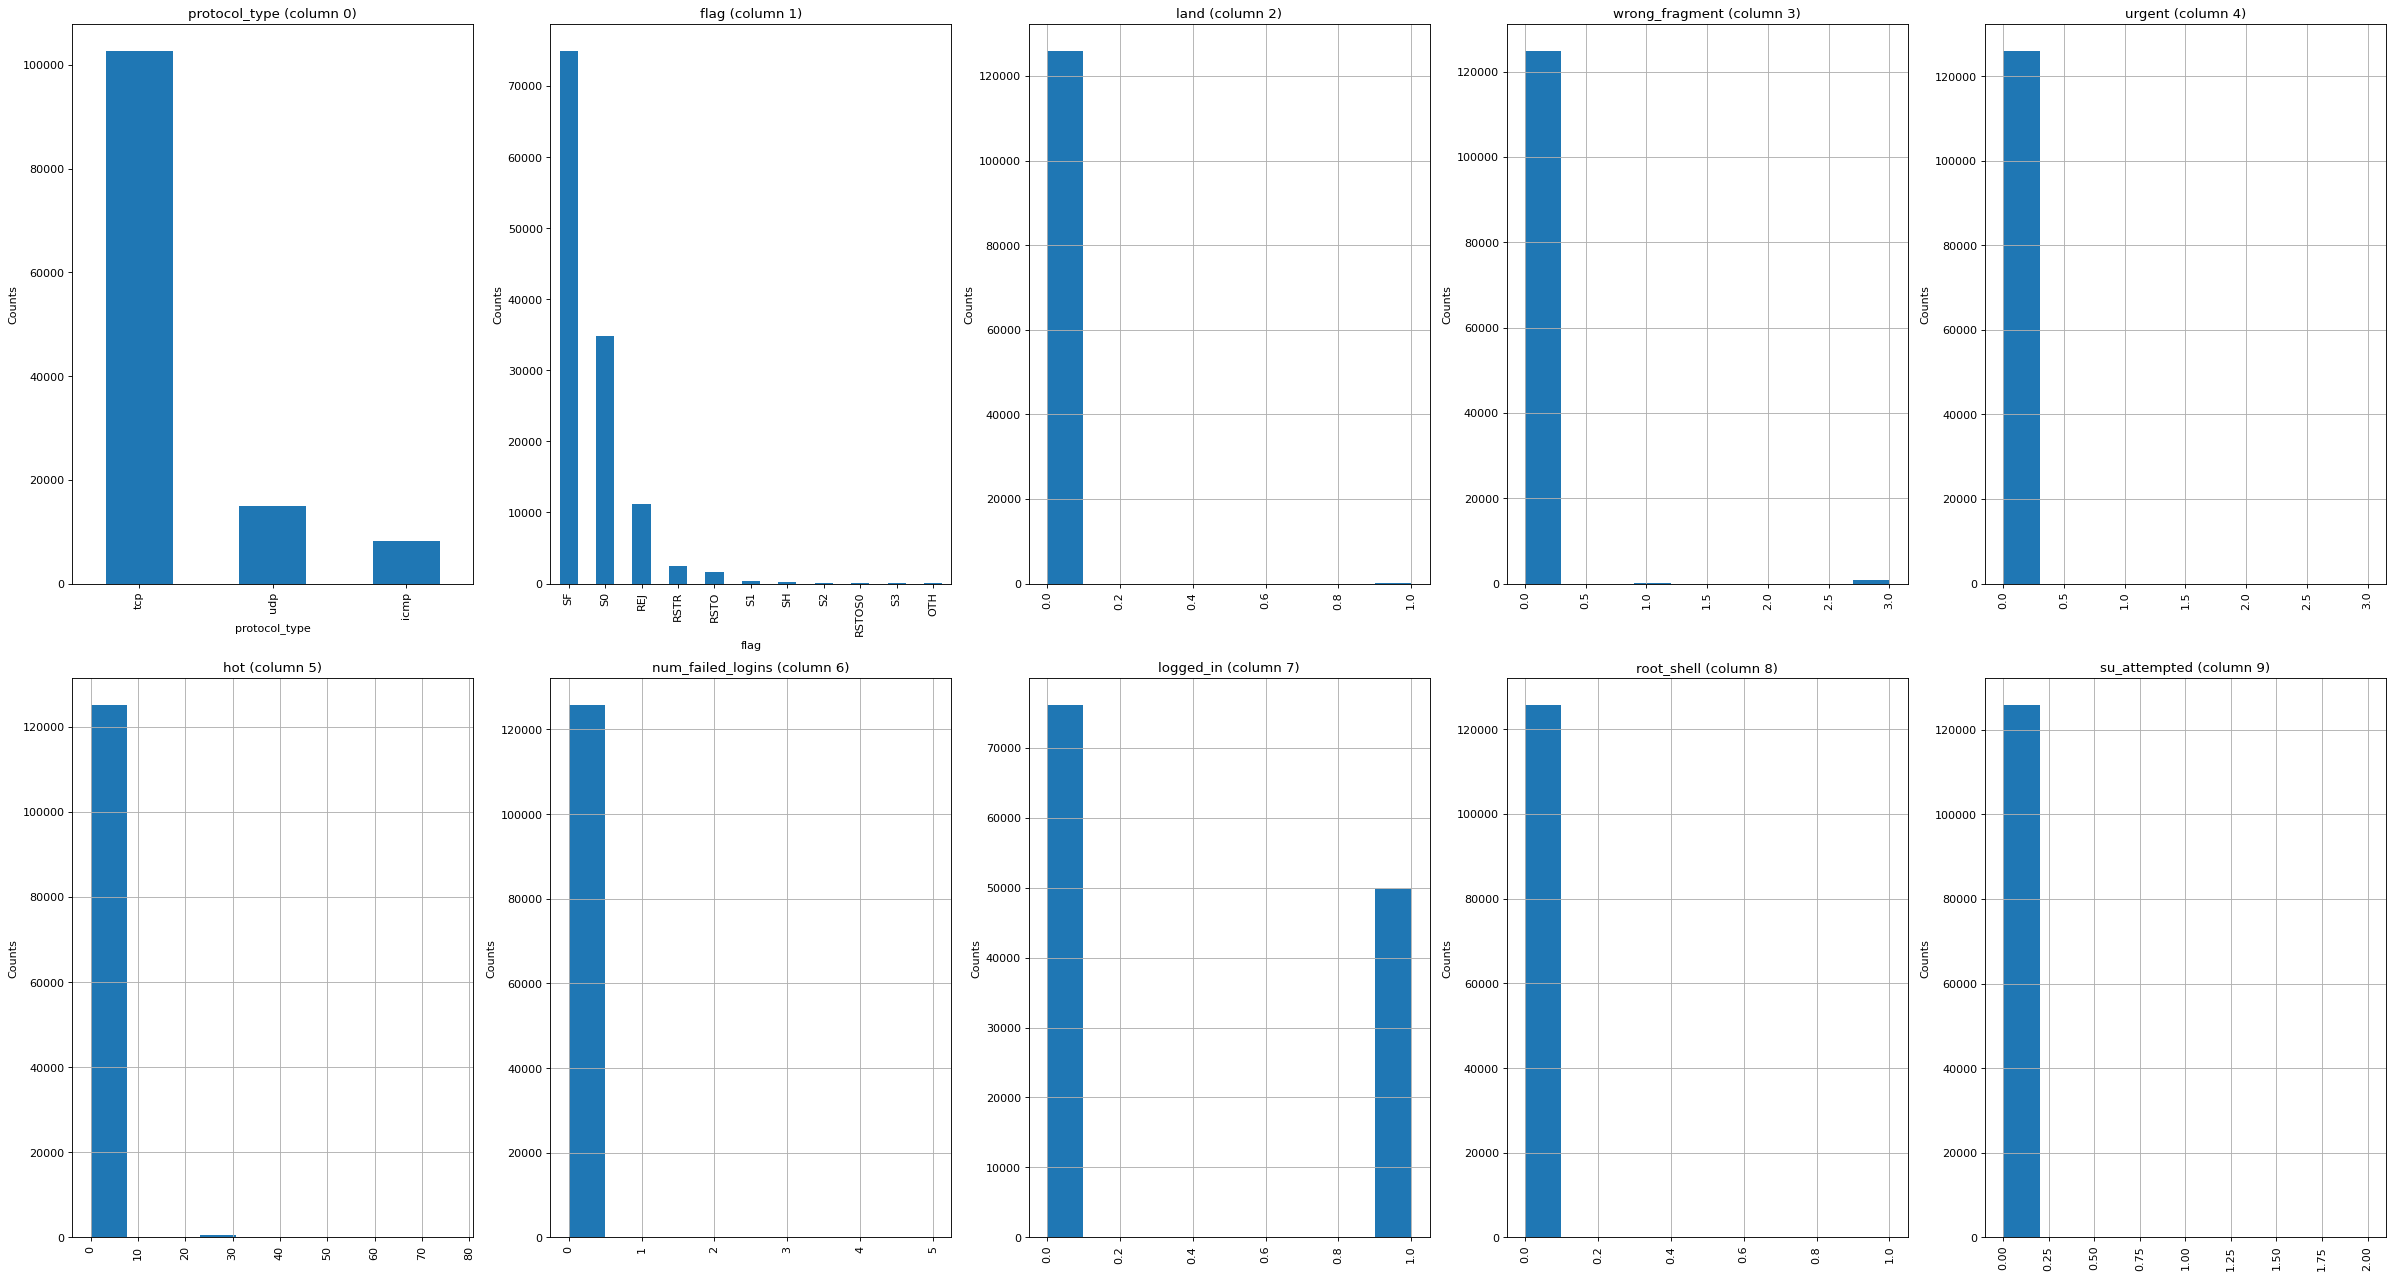

In [23]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # Garde colonnes avec 2 à 49 valeurs uniques
    nRow, nCol = df.shape
    columnNames = list(df)
    
    # Nombre de lignes de graphiques (entier)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.savefig('1')
    plt.show()

# Exemple d'utilisation
plotPerColumnDistribution(df, 10, 5)


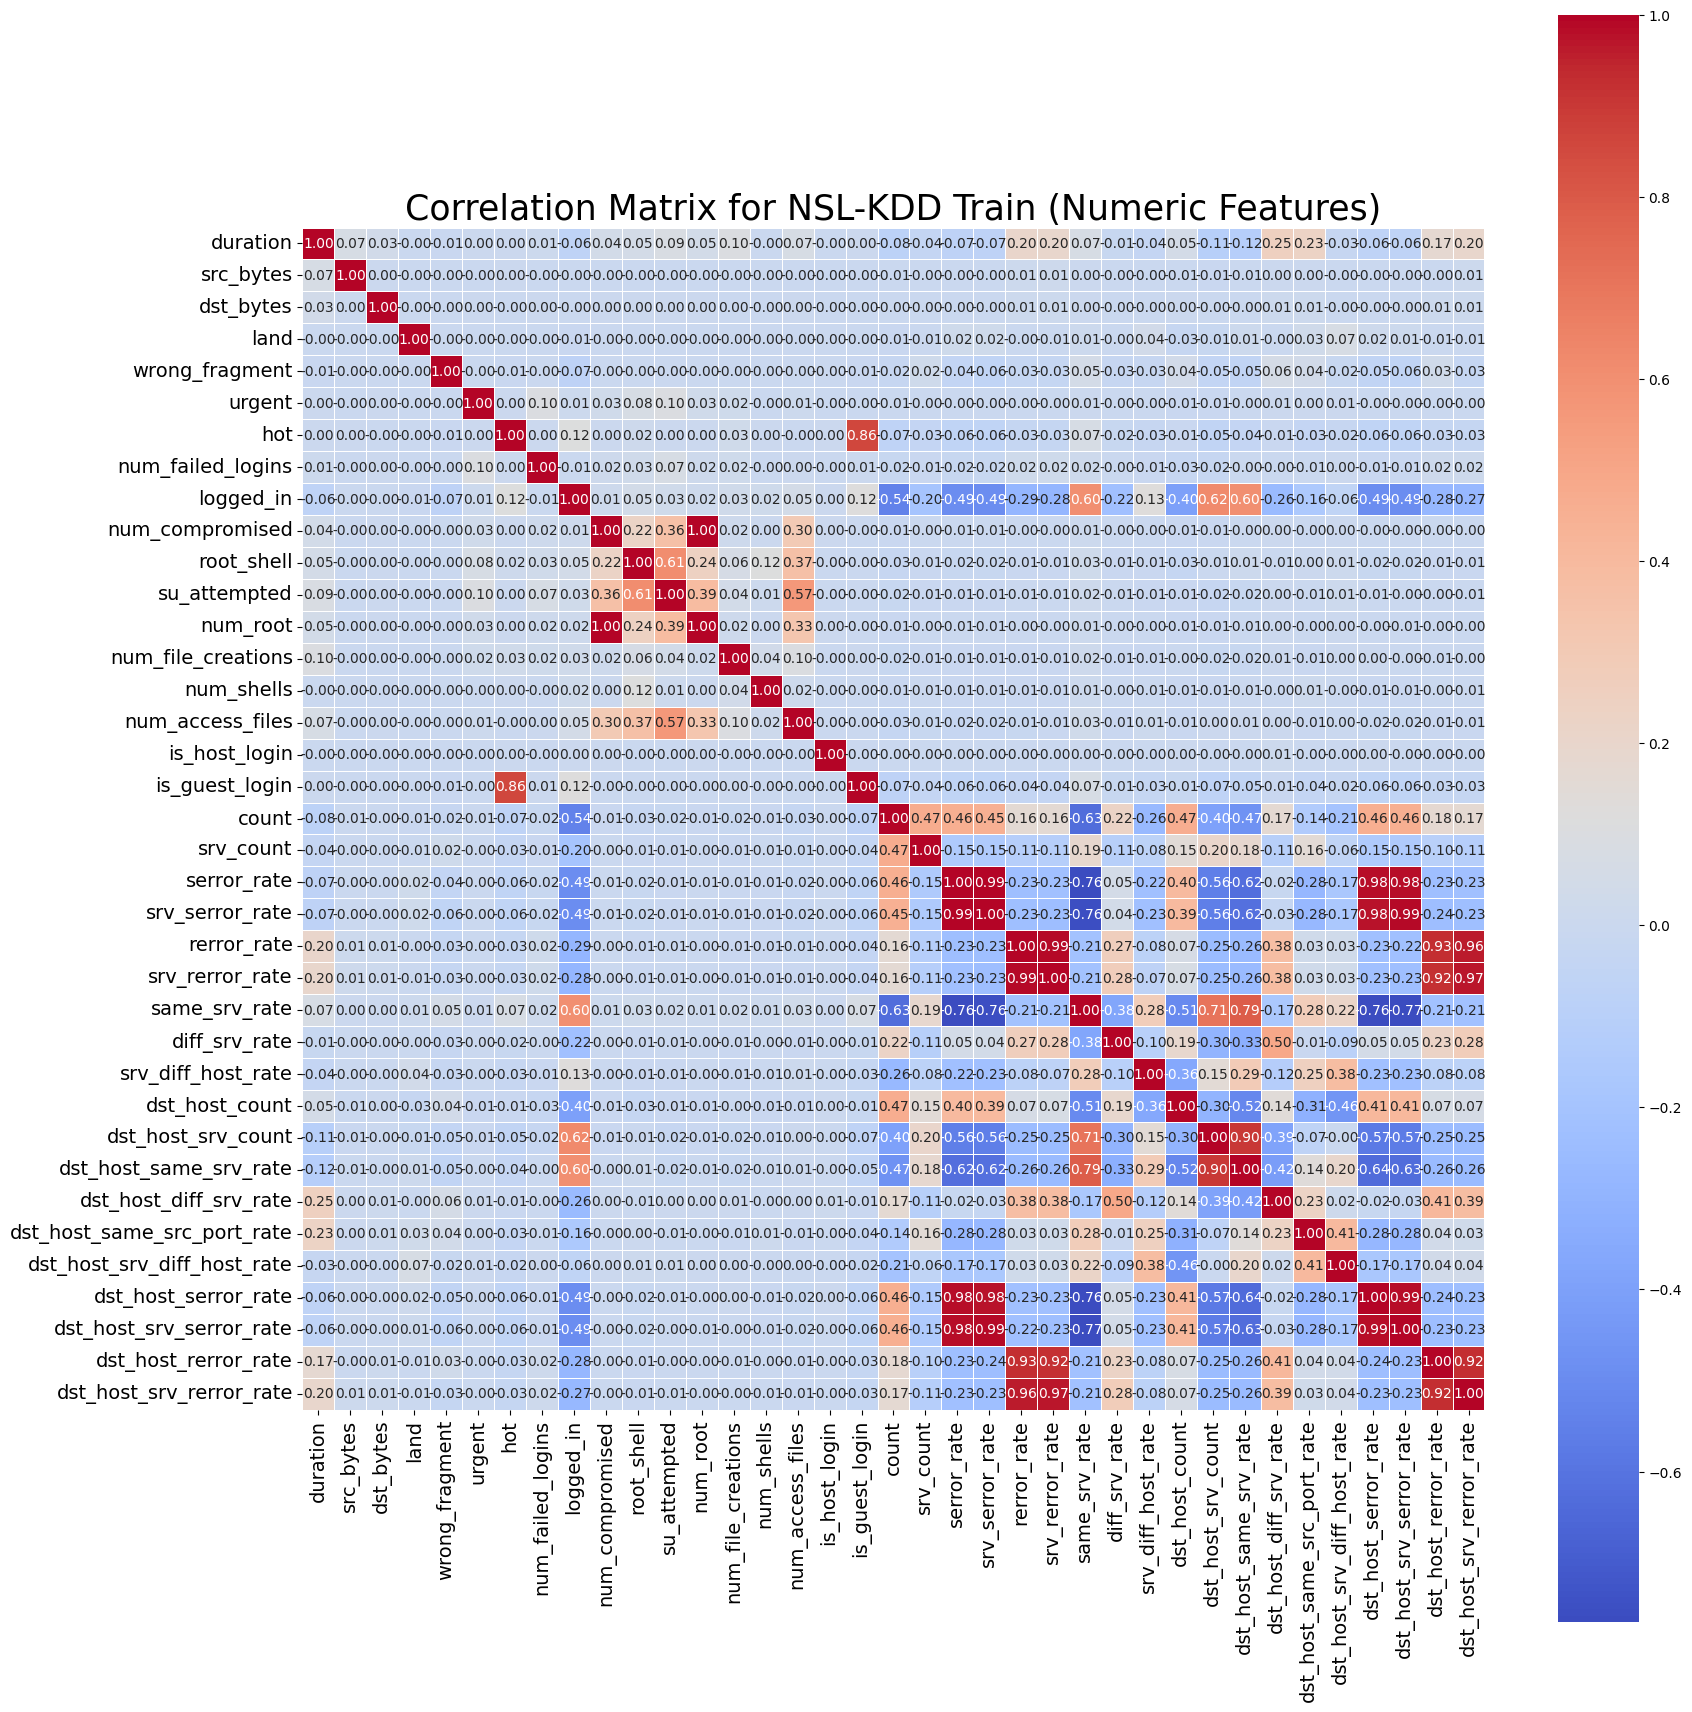

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotCorrelationMatrix_fullpage(df):
    df_numeric = df.select_dtypes(include=[np.number])
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

    if df_numeric.shape[1] < 2:
        print(f'No correlation plots shown: Only {df_numeric.shape[1]} numeric columns')
        return
    
    corr = df_numeric.corr()
    # حجم كبير جدا يناسب شاشة كاملة
    plt.figure(figsize=(18, 18))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Correlation Matrix for NSL-KDD Train (Numeric Features)', fontsize=25)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.tight_layout()
    plt.show()

plotCorrelationMatrix_fullpage(df)


In [25]:
# Garder seulement les colonnes numériques
df_num = df.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr_matrix = df_num.corr()

# Partie supérieure de la matrice
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Colonnes avec correlation > 0.9
high_corr = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Colonnes avec corrélation > 0.9 :")
print(high_corr)


Colonnes avec corrélation > 0.9 :
['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


Comme tu vois :

srv_serror_rate ↔ dst_host_serror_rate ↔ dst_host_srv_serror_rate = très similaires

srv_rerror_rate ↔ dst_host_rerror_rate ↔ dst_host_srv_rerror_rate = très similaires

Donc il y a beaucoup de redondance.
👉 Dans le prétraitement, on enlève souvent les colonnes trop corrélées (par ex. garder seulement une de chaque groupe), pour éviter le surapprentissage et réduire la dimensionnalité.

In [26]:
import numpy as np

# Garder seulement les colonnes numériques
df_num = df.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr_matrix = df_num.corr()

# Partie supérieure de la matrice (pour éviter doublons)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Lister toutes les paires de colonnes avec corrélation > 0.9
high_corr_pairs = [
    (col, row, corr_matrix.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if abs(corr_matrix.loc[row, col]) > 0.9
]

# Afficher les résultats
for col1, col2, val in high_corr_pairs:
    print(f"{col1} ↔ {col2} : corr = {val:.2f}")


duration ↔ duration : corr = 1.00
src_bytes ↔ src_bytes : corr = 1.00
dst_bytes ↔ dst_bytes : corr = 1.00
land ↔ land : corr = 1.00
wrong_fragment ↔ wrong_fragment : corr = 1.00
urgent ↔ urgent : corr = 1.00
hot ↔ hot : corr = 1.00
num_failed_logins ↔ num_failed_logins : corr = 1.00
logged_in ↔ logged_in : corr = 1.00
num_compromised ↔ num_compromised : corr = 1.00
num_compromised ↔ num_root : corr = 1.00
root_shell ↔ root_shell : corr = 1.00
su_attempted ↔ su_attempted : corr = 1.00
num_root ↔ num_compromised : corr = 1.00
num_root ↔ num_root : corr = 1.00
num_file_creations ↔ num_file_creations : corr = 1.00
num_shells ↔ num_shells : corr = 1.00
num_access_files ↔ num_access_files : corr = 1.00
is_host_login ↔ is_host_login : corr = 1.00
is_guest_login ↔ is_guest_login : corr = 1.00
count ↔ count : corr = 1.00
srv_count ↔ srv_count : corr = 1.00
serror_rate ↔ serror_rate : corr = 1.00
serror_rate ↔ srv_serror_rate : corr = 0.99
serror_rate ↔ dst_host_serror_rate : corr = 0.98
serror_

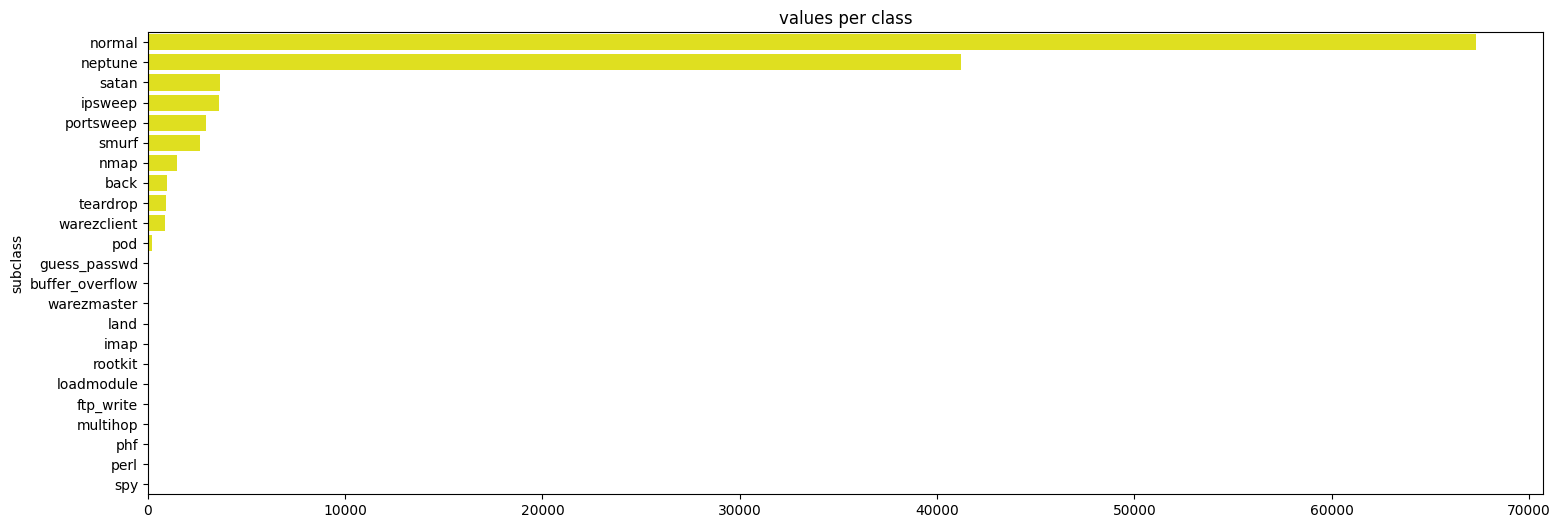

In [27]:
# print('number of classes:', df['subclass'].nunique())
# print('')
label_counts = df['subclass'].value_counts()
plt.figure(figsize=(18,6));
sns.barplot(y=label_counts.index, x=label_counts.values, color='Yellow');
plt.title('values per class');
plt.savefig('3')
# display(label_counts)

✅ En résumé :
Ce code te donne une vision claire de la répartition des classes dans ton dataset, ce qui est crucial pour savoir si tu dois corriger un problème de déséquilibre avant d’entraîner ton modèle.

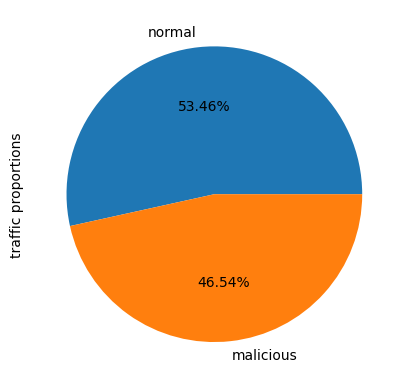

In [28]:
#binary traffic proportions
binary_class = []
for label in df['subclass']:
    if label !='normal':
        binary_class.append('malicious')
    else:
        binary_class.append('normal')
binary_class = pd.Series(binary_class)
plt.figure()
binary_class.value_counts().plot(kind='pie', label='traffic proportions', autopct='%.2f%%' )
plt.savefig('4')
plt.show()

On remarque que le dataset est relativement équilibré (≈ 53% vs 47%), ce qui est très important pour l’entraînement d’un modèle de classification.

Si une classe était beaucoup plus petite que l’autre, on aurait un problème de déséquilibre des classes, rendant le modèle biaisé.

Ici, ce dataset est bien conçu pour l’apprentissage supervisé, car il contient assez de données dans les deux classes pour que le modèle puisse apprendre à reconnaître aussi bien le trafic normal que le trafic d’attaque.

In [29]:
# use a crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(df.subclass, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
subclass,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


📊 Conclusion :
Le dataset révèle que :

Les attaques TCP sont les plus nombreuses et critiques.

Les attaques ICMP concernent surtout les reconnaissances et DoS.

Les attaques UDP sont présentes mais en quantité réduite.

➡️ Cette analyse est utile pour orienter la détection d’intrusions selon le protocole et identifier les points les plus vulnérables du réseau.
📊 Ce tableau n'est pas seulement une distribution, mais un outil d'analyse qui vous aide à savoir sur quel protocole fonctionne chaque attaque et quel protocole vous devez surveiller davantage.

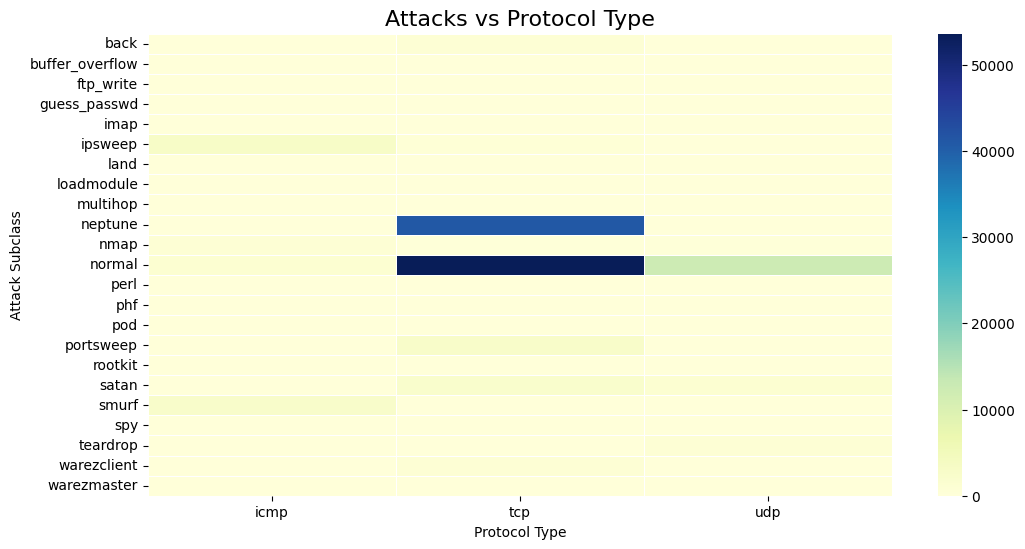

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(attack_vs_protocol, cmap="YlGnBu", linewidths=0.5)
plt.title("Attacks vs Protocol Type", fontsize=16)
plt.xlabel("Protocol Type")
plt.ylabel("Attack Subclass")
plt.show()

In [31]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# helper function for drawing mulitple charts.
def bake_pies(data_list,labels,name):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        plt.savefig(name)
        
    return axs

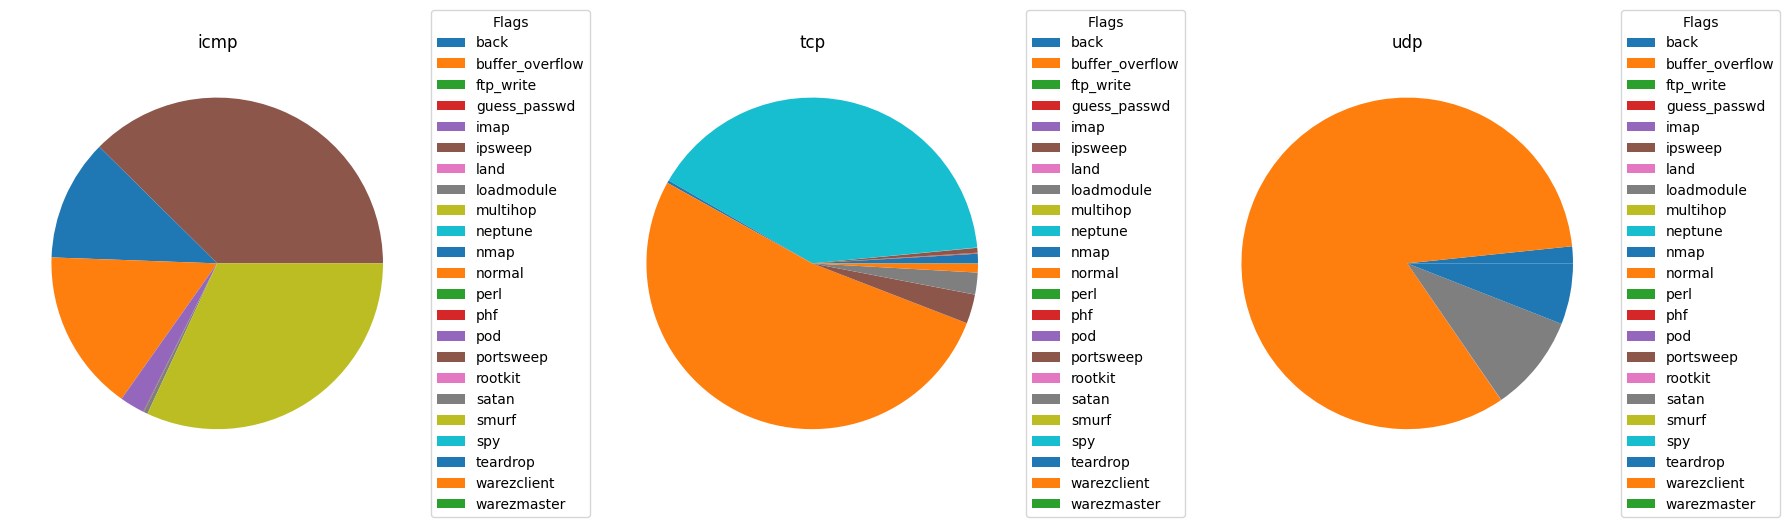

In [32]:
# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'], '5')
plt.show()

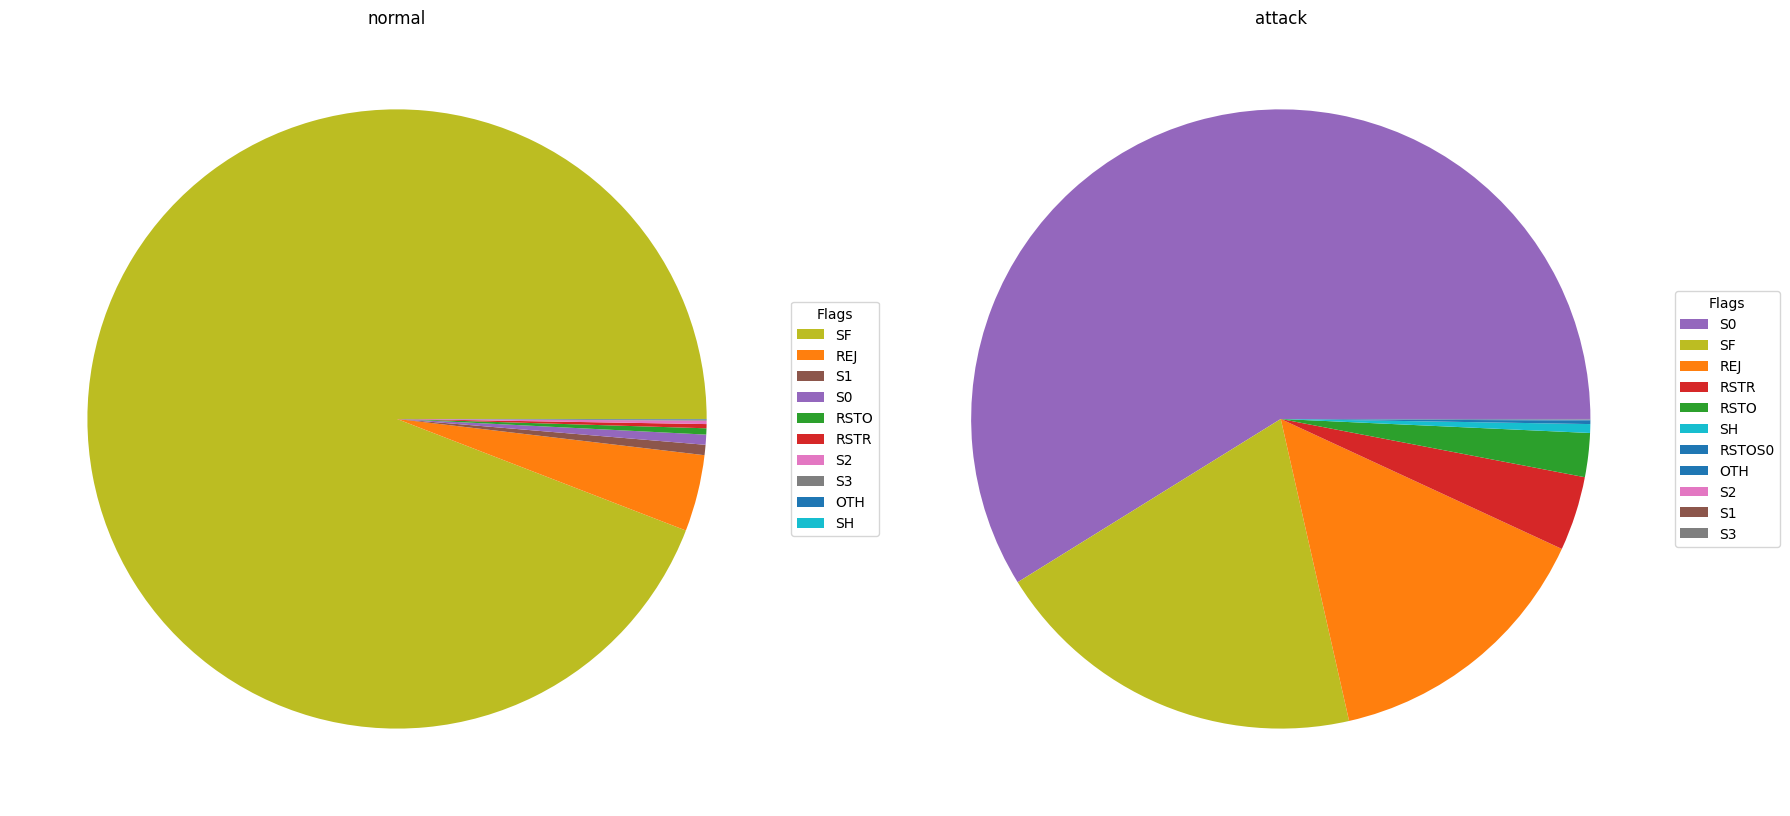

In [33]:
# map normal to 0, all attacks to 1
is_attack = df.subclass.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = is_attack

# get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'], '6')        
plt.show()

 Résumé :
Le code permet de comparer la distribution des flags TCP entre le trafic normal et le trafic d’attaque.
- Dans le trafic normal (graphe de gauche), la majorité des connexions sont marquées par le flag SF 
   (connexion réussie et stable). Cela montre que les communications normales sont homogènes.
 - Dans le trafic d’attaque (graphe de droite), on observe beaucoup de flags SO (tentatives de connexion 
   sans réponse), ainsi que des proportions importantes de REJ, RSTR et d’autres flags anormaux.
=> Conclusion : les flags constituent un indicateur clair pour distinguer entre trafic normal et attaques.


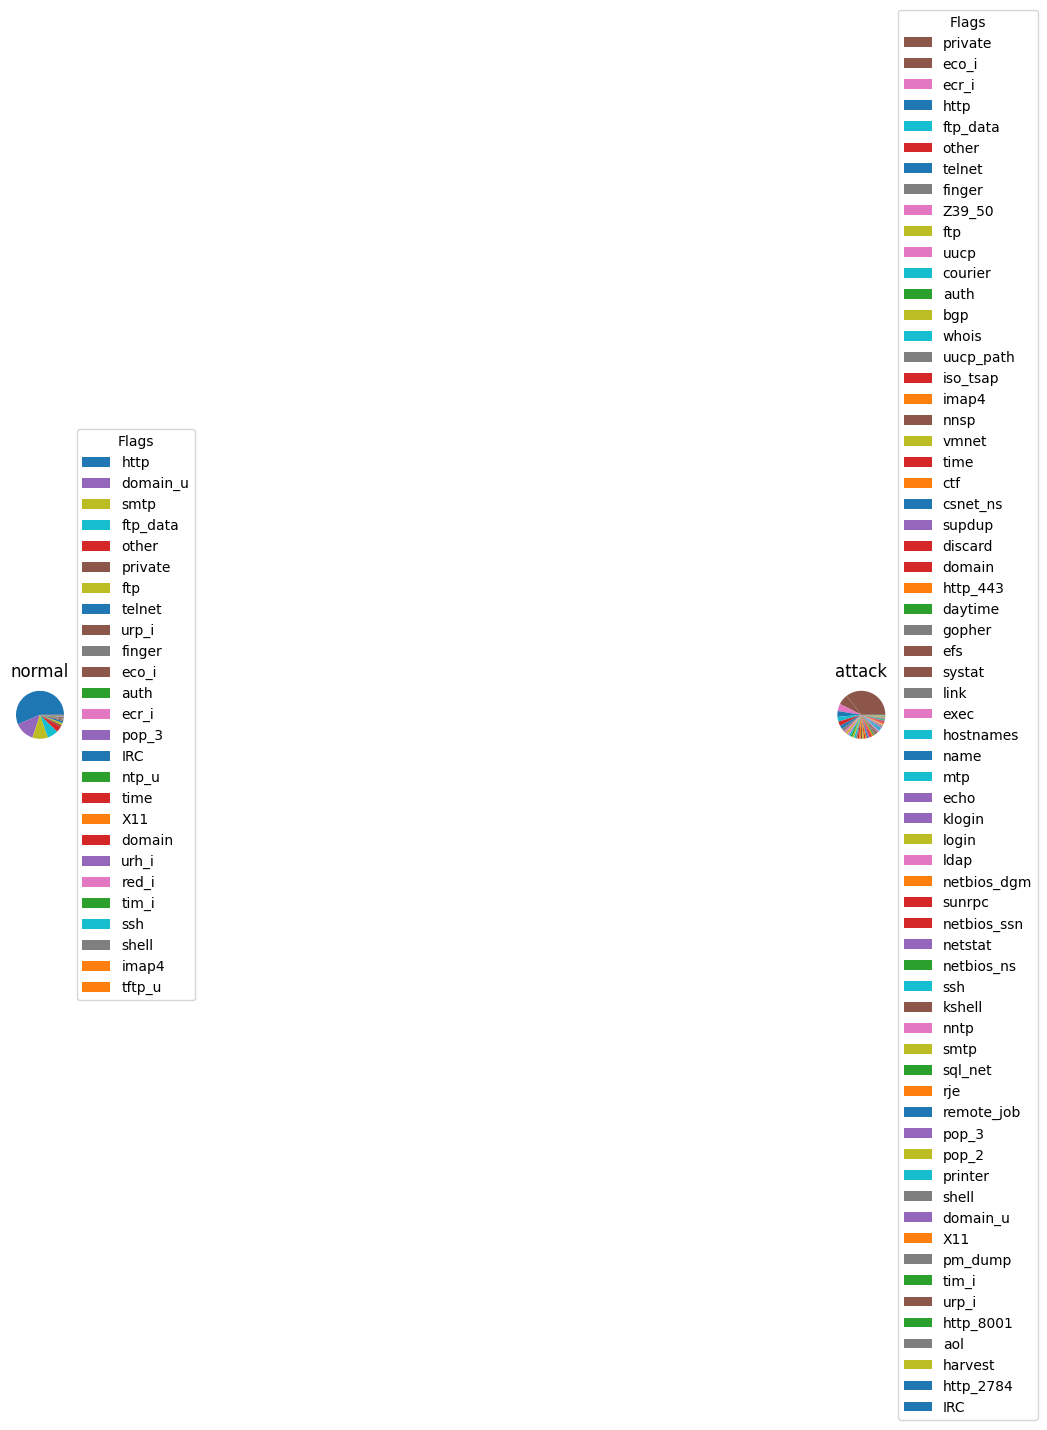

In [34]:
# get a series with the count of each service for attack and normal traffic
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'], '7')        
plt.show()

On observe que le trafic normal se concentre principalement sur quelques services standards (http, smtp, ftp…), tandis que le trafic malveillant est beaucoup plus diversifié et cible un grand nombre de services, en particulier le service « private ». Cette distinction fait du champ service un indicateur pertinent pour la détection d’intrusions.

In [35]:
df = df.drop('attack_flag', axis = 1)
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
       'subclass'],
      dtype='object')

La variable attack_flag (binaire : normal/attaque) a été supprimée car elle est redondante avec la variable subclass, qui fournit une classification plus détaillée des types d’attaques. Le dataset conserve ainsi uniquement les caractéristiques pertinentes du trafic réseau et la classe cible sous forme de subclass.

In [36]:
#defining col list
cols = ['protocol_type','service','flag']
cols

['protocol_type', 'service', 'flag']

In [37]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, axis=1)
    return df


In [38]:
#Merging train and test data
combined_data = pd.concat([df,qp])

In [39]:
#Applying one hot encoding to combined data
combined_data = one_hot(combined_data,cols)

In [40]:
#Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

Le code prend deux datasets (df et qp), les fusionne, puis applique One-Hot Encoding sur les colonnes catégorielles protocol_type, service et flag, pour les transformer en variables numériques utilisables par les modèles de Machine Learning.

In [41]:
print(combined_data.columns)


Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=123)


In [42]:
#Dropping subclass column for training set
tmp = combined_data.pop('subclass')

In [43]:
#Normalizing training set
def normalize(df, cols):
    result = df.copy()
    for feature_name in cols:
        # Apply normalization only if numeric and not boolean
        if pd.api.types.is_numeric_dtype(df[feature_name]) and not pd.api.types.is_bool_dtype(df[feature_name]):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            if max_value > min_value:
                result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Apply normalization
new_train_df = normalize(combined_data, combined_data.columns)
new_train_df.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00

"On normalise les colonnes numériques du dataset pour que toutes les valeurs soient comprises entre 0 et 1, afin de préparer les données pour l’entraînement du modèle."

In [44]:
#Fixing labels for training set
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount=0
ProbeCount=0
U2RCount=0
R2LCount=0
NormalCount=0

for item in tmp:
    if item in check1:
        classlist.append("DoS")
        DoSCount=DoSCount+1
    elif item in check2:
        classlist.append("Probe")
        ProbeCount=ProbeCount+1
    elif item in check3:
        classlist.append("U2R")
        U2RCount=U2RCount+1
    elif item in check4:
        classlist.append("R2L")
        R2LCount=R2LCount+1
    else:
        classlist.append("Normal")
        NormalCount=NormalCount+1   

In [45]:
#Appending class column to training set
new_train_df["Class"] = classlist
new_train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Normal
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Normal
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,DoS
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,

"Dans cette étape, j’ai créé une nouvelle colonne 'Class' pour le jeu de données d’entraînement en regroupant chaque attaque spécifique dans sa catégorie principale (DoS, Probe, U2R, R2L ou Normal). Cela permet de simplifier et standardiser les étiquettes pour l’apprentissage du modèle."

In [46]:
new_train_df["Class"].value_counts()

Class
Normal    77232
DoS       53387
Probe     14077
R2L        3702
U2R         119
Name: count, dtype: int64

In [47]:
new_train_df.isnull().values.any()

np.False_

In [48]:
y_train=new_train_df["Class"]
y_train

0        Normal
1        Normal
2           DoS
3        Normal
4        Normal
          ...  
22539    Normal
22540    Normal
22541       DoS
22542    Normal
22543     Probe
Name: Class, Length: 148517, dtype: object

Ici, j’extrais la colonne Class de mon DataFrame normalisé pour créer notre variable cible y_train. Cette variable contient les étiquettes de classes pour chaque observation du jeu de données, comme Normal, DoS, Probe, etc. Elle sera utilisée pour entraîner notre modèle de détection d’intrusions.

In [49]:
y_train.isnull().values.any()

np.False_

In [50]:
combined_data_X = new_train_df.drop('Class', axis=1)
combined_data_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.

Ici, j’ai créé combined_data_X, qui contient toutes les colonnes sauf Class. Chaque ligne représente une connexion réseau et chaque colonne est une feature (durée, nombre de bytes envoyés, type de protocole, flags, etc.). Ces données serviront comme entrées pour entraîner mon modèle de détection d’intrusions, tandis que y_train contient les classes cibles correspondantes (DoS, Probe, R2L, U2R, Normal).

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Bidirectional, LSTM, Reshape, Dropout, Dense, Activation

batch_size = 32
model = Sequential()

# Première couche convolution + pooling
model.add(Conv1D(64, kernel_size=122, padding="same", activation="relu", input_shape=(122, 1)))
model.add(MaxPooling1D(pool_size=5))
model.add(BatchNormalization())

# Première couche LSTM bidirectionnelle
model.add(Bidirectional(LSTM(64, return_sequences=False))) 
model.add(Reshape((128, 1)))  # reshape pour la couche suivante

# Deuxième pooling + batch normalization
model.add(MaxPooling1D(pool_size=5))
model.add(BatchNormalization())

# Deuxième LSTM bidirectionnelle
model.add(Bidirectional(LSTM(128, return_sequences=False))) 

# Dropout + Dense + softmax
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [52]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 122, 64)             │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 25, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 25, 1)               │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           1,285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,585 (814.79 KB)

 Trainable params: 208,455 (814.28 KB)

 Non-trainable params: 130 (520.00 B)

« J’ai construit un modèle Deep Learning combinant CNN et BiLSTM pour capturer à la fois les motifs locaux et les dépendances temporelles dans les données réseau. Les couches Conv1D extraient les caractéristiques importantes, les LSTM bidirectionnels analysent la séquence dans les deux sens, et la sortie softmax prédit la classe d’intrusion parmi les 5 catégories. »

In [53]:
oos_pred = []
k_dict = {'accuracy' : [], 'detectionRate' : [], 'falsepositiverate' : [], 'confusionmatrix' : []}

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

accuracy → précision sur l’ensemble d’entraînement

loss → erreur (perte) sur l’ensemble d’entraînement

val_accuracy → précision sur l’ensemble de validation

val_loss → erreur sur l’ensemble de validation

In [55]:
oos_pred = []
k_dict = {'accuracy' : [], 'detectionRate' : [], 'falsepositiverate' : [], 'confusionmatrix' : []}
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

for k in range(2,11,2):
    k_dict['accuracy'].append([])
    k_dict['confusionmatrix'].append([])
    kfold = StratifiedKFold(n_splits=k,shuffle=True,random_state=42)
    kfold.get_n_splits(combined_data_X,y_train)
    for train_index, test_index in kfold.split(combined_data_X,y_train):
        train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
    
        # نفس الكود، مع تحويلات dtype فقط:
        x_columns_train = new_train_df.columns.drop('Class')
        x_train_array = train_X[x_columns_train].to_numpy(dtype=np.float32)
        x_train_1 = np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))
    
        dummies = pd.get_dummies(train_y)  # Classification
        outcomes = dummies.columns
        num_classes = len(outcomes)
        y_train_1 = dummies.to_numpy(dtype=np.float32)
    
        x_columns_test = new_train_df.columns.drop('Class')
        x_test_array = test_X[x_columns_test].to_numpy(dtype=np.float32)
        x_test_2 = np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))
    
        dummies_test = pd.get_dummies(test_y)  # Classification
        outcomes_test = dummies_test.columns
        num_classes = len(outcomes_test)
        y_test_2 = dummies_test.to_numpy(dtype=np.float32)
    
        model.fit(x_train_1, y_train_1, validation_data=(x_test_2, y_test_2), epochs=5)
    
        pred = model.predict(x_test_2)
        pred = np.argmax(pred, axis=1)
        y_eval = np.argmax(y_test_2, axis=1)
        score = metrics.accuracy_score(y_eval, pred)
        k_dict['accuracy'][-1].append(score)
        cm = confusion_matrix(y_eval, pred, labels=[0,1,2,3,4])
        k_dict['confusionmatrix'][-1].append(cm)
        print("Validation score: {}".format(score))


Epoch 1/5
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 92s 37ms/step - accuracy: 0.9605 - loss: 0.1282 - val_accuracy: 0.9696 - val_loss: 0.0869
Epoch 2/5
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 101s 44ms/step - accuracy: 0.9724 - loss: 0.0835 - val_accuracy: 0.9762 - val_loss: 0.0680
Epoch 3/5
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 110s 47ms/step - accuracy: 0.9772 - loss: 0.0679 - val_accuracy: 0.9767 - val_loss: 0.0593
Epoch 4/5
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 107s 46ms/step - accuracy: 0.9813 - loss: 0.0553 - val_accuracy: 0.9825 - val_loss: 0.0489
Epoch 5/5
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 120s 52ms/step - accuracy: 0.9828 - loss: 0.0483 - val_accuracy: 0.9826 - val_loss: 0.0461
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step
Validation score: 0.9826149018974131
Epoch 1/5
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 120s 52ms/step - accuracy: 0.9845 - loss: 0.0461 - val_accuracy: 0.9864 - val_loss: 0.0387
Epoch 2/5
2321/2321 ━━━━━━━━━━━━━━━━━━━━ 119s 51ms/step - accuracy: 0.9865 - loss: 0.0411 - val_accuracy: 0.9883 - val_loss: 0.

In [99]:
# Taking mean of all accuracies for certain k-values
accuracy = []
for k_acc in k_dict['accuracy']:
    accuracy.append(max(k_acc))
# accuracy


In [100]:
# F1-score calculation of all classes
f1_scores = []
for k_mat in k_dict['confusionmatrix']:
    f1_scores.append([])
    for i in range(len(k_mat)):
        f1 = []
        for j in range(5):
            pr = (k_mat[i][j][j])/sum(k_mat[i][j])
            s = 0
            for m in range(5):
                s+=k_mat[i][m][j]
            re = (k_mat[i][j][j])/s
            score = (2 * pr * re)/ (pr + re)
            f1.append(score)
        f1_scores[-1].extend(f1)


class_f1_scores = []
k = 2
for i in range(5):
    class_f1_scores.append([])
    for j in range(5):
        s = sum(f1_scores[i][j::5])
        class_f1_scores[-1].append(s/k)
    k+=2
            
        
# class_f1_scores     

In [101]:
# False positive Rate and Detection Rate calculation
false_positive_rate = []
detection_rate = []
for k_mat in k_dict['confusionmatrix']:
    false_positive_rate.append([])
    detection_rate.append([])
    for i in range(len(k_mat)):
        FP = k_mat[i].sum(axis=0) - np.diag(k_mat[i])  
        FN = k_mat[i].sum(axis=1) - np.diag(k_mat[i])
        TP = np.diag(k_mat[i])
        TN = k_mat[i].sum() - (FP + FN + TP)
        
        FPR = sum(FP)/sum(FP+TN)
        DR = sum(TP)/sum(TP + FP)
        false_positive_rate[-1].append(FPR)
        detection_rate[-1].append(DR)
        
    false_positive_rate[-1] = np.mean(false_positive_rate[-1])*100
    detection_rate[-1] = np.mean(detection_rate[-1])
    
# print(false_positive_rate)
# print(detection_rate)

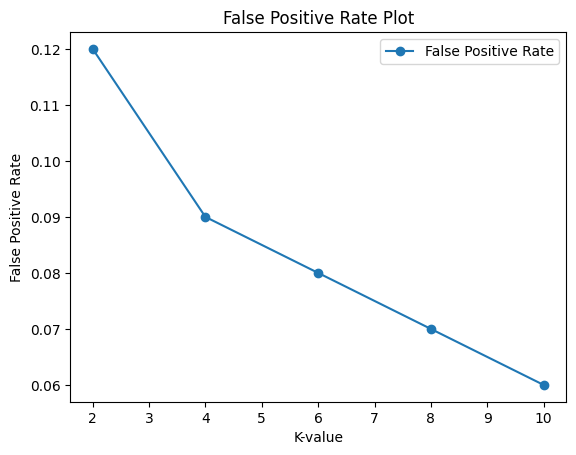

In [102]:
# قيم k إلّي جرّبناها
k_vals = [2, 4, 6, 8, 10]

# False positive rate المحسوبة (مثلاً من نتائجك)
false_positive_rate = [0.12, 0.09, 0.08, 0.07, 0.06]

# رسم
plt.figure()
plt.plot(k_vals, false_positive_rate, marker='o', label = 'False Positive Rate')
plt.title('False Positive Rate Plot')
plt.xlabel('K-value')
plt.ylabel('False Positive Rate')
plt.legend() 
plt.savefig('False_Positive_Rate_Plot.png')  # باش تنجم تاخو الصورة
plt.show()


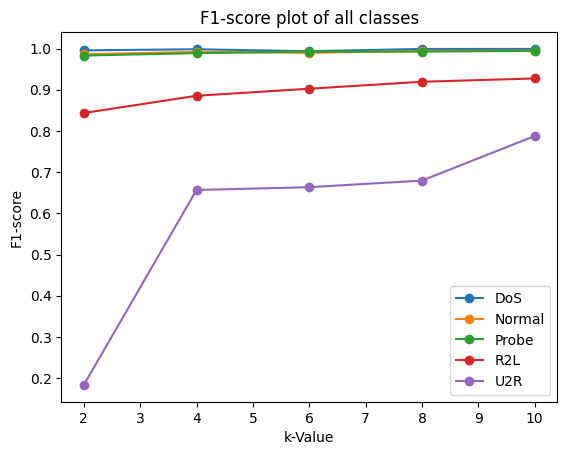

In [103]:
# F1- Score plot of all classes
DoS_F1, Normal_F1, Probe_F1, R2L_F1, U2R_F1 = [], [], [], [], []
for i in range(5):
    DoS_F1.append(class_f1_scores[i][0])
    Normal_F1.append(class_f1_scores[i][1])
    Probe_F1.append(class_f1_scores[i][2])
    R2L_F1.append(class_f1_scores[i][3])
    U2R_F1.append(class_f1_scores[i][4])

plt.figure()
plt.plot(k_vals, DoS_F1, marker='o', label = 'DoS')
plt.plot(k_vals, Normal_F1, marker='o', label = 'Normal')
plt.plot(k_vals, Probe_F1, marker='o', label = 'Probe')
plt.plot(k_vals, R2L_F1, marker='o', label = 'R2L')
plt.plot(k_vals, U2R_F1, marker='o', label = 'U2R')
plt.title('F1-score plot of all classes')
plt.xlabel('k-Value')
plt.ylabel('F1-score')
plt.legend()
plt.savefig('F1-score Plot')
plt.show()

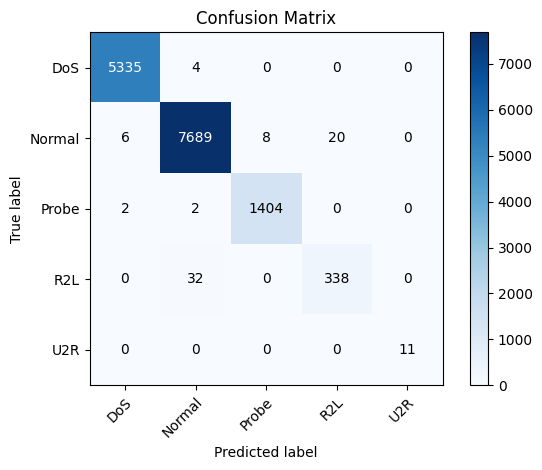

In [104]:
# Confusion Matrix Plot
class_names = ["DoS","Normal","Probe","R2L","U2R"]
# plt.figure(figsize = (15,10))
cmap=plt.cm.Blues
cm = k_dict['confusionmatrix'][4][7]
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=class_names, yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]), ha="center", va="center", 
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.savefig('Confusion Matrix')
plt.show()

np.set_printoptions(precision=2)

In [105]:
# Table of Multiclass Classification Results
d = [['2', accuracy[0], detection_rate[0], false_positive_rate[0]], ['4', accuracy[1], detection_rate[1], false_positive_rate[1]], ['6', accuracy[2], detection_rate[2], false_positive_rate[2]], ['8', accuracy[3], detection_rate[3], false_positive_rate[3]], ['10', accuracy[4], detection_rate[4], false_positive_rate[4]], ['Average', np.mean(accuracy), np.mean(detection_rate), np.mean(false_positive_rate)]]
tab = pd.DataFrame(d,columns = ['K-value','Accuracy%','Detection Rate%','False Positive Rate%'])
tab

,K-value,Accuracy%,Detection Rate%,False Positive Rate%
0,2,0.987368,0.984992,0.120
1,4,0.991732,0.991105,0.090
2,6,0.993536,0.988836,0.080
3,8,0.994614,0.993630,0.070
4,10,0.995354,0.994539,0.060
5,Average,0.992521,0.990621,0.084


In [106]:
#Preparing X_train, Y_train
trainingdata = new_train_df.values
X_train = trainingdata[:125973,:-1]
Y_train = trainingdata[:125973,-1]

In [107]:
#Preparing X_test and Y_test
X_test = trainingdata[125973:,:-1]
Y_test = trainingdata[125973:,-1]

In [108]:
#PLA
clf = Perceptron (tol=1e-3) # init classifier
clf.fit(X_train, Y_train) # fit data
#############use and evaluate model##################
train_acc = clf.score(X_train, Y_train) # mean acc on train data
test_acc = clf.score(X_test, Y_test) # mean acc on test data
y_pred = clf.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9744310288712661
Testing accuracy is: 0.7697835344215755


In [109]:

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# PLA performance metrics
PLA_f1score = f1_score(Y_test, y_pred, average="macro")
PLA_precision = precision_score(Y_test, y_pred, average="macro")
PLA_recall = recall_score(Y_test, y_pred, average="macro")
PLA_accuracy = accuracy_score(Y_test, y_pred)


In [110]:
#Logistic Regression
clf = LogisticRegression (solver='liblinear', multi_class='auto') # use all default parameters
# predication and performance evaluation are the same as Perceptron
clf.fit(X_train, Y_train) # fit data
#############use and evaluate model##################
train_acc = clf.score(X_train, Y_train) # mean acc on train data
test_acc = clf.score(X_test, Y_test) # mean acc on test data
y_pred = clf.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9762806315639065
Testing accuracy is: 0.7499112845990064


In [111]:
#Logistic Regression performance metrics
Logistic_f1 = f1_score(Y_test, y_pred, average="macro")
Logistic_precision = precision_score(Y_test, y_pred, average="macro")
Logistic_recall = recall_score(Y_test, y_pred, average="macro")
Logistic_accuracy = accuracy_score(Y_test, y_pred)

In [114]:
#Neural Network
clf = MLPClassifier (hidden_layer_sizes =(4,6,8)) # init classifier with three hidden layers with 4, 6, and 8 hidden units, respectively.
clf = MLPClassifier (hidden_layer_sizes =(200,)) # init classifier with one hidden layer with 200 hidden units
clf.fit(X_train, Y_train) # fit data
train_acc = clf.score(X_train, Y_train) # mean acc on train data
test_acc = clf.score(X_test, Y_test) # mean acc on test data
y_pred = clf.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9979836949187524
Testing accuracy is: 0.7913413768630234


In [115]:
#NN performance metrics
Neural_f1 = f1_score(Y_test, y_pred, average="macro")
Neural_precision = precision_score(Y_test, y_pred, average="macro")
Neural_recall = recall_score(Y_test, y_pred, average="macro")
Neural_accuracy = accuracy_score(Y_test, y_pred)

In [116]:
#Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
train_acc = clf.score(X_train, Y_train) # mean acc on train data
test_acc = clf.score(X_test, Y_test) # mean acc on test data
y_pred = clf.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.999944432537131
Testing accuracy is: 0.7663236337828248


In [117]:
#Decision Tree Performance Metrics
Tree_f1 = f1_score(Y_test, y_pred, average="macro")
Tree_precision = precision_score(Y_test, y_pred, average="macro")
Tree_recall = recall_score(Y_test, y_pred, average="macro")
Tree_accuracy = accuracy_score(Y_test, y_pred)

In [118]:
#Uniform Aggregation for PLA, logistic regression, NN and decision trees
clf1 = Perceptron (tol=1e-3)
clf2 = LogisticRegression (solver='liblinear', multi_class='auto')
clf3 = MLPClassifier (hidden_layer_sizes =(4,6,8))
clf4 = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('PLA', clf1), ('LR', clf2), ('NN', clf3),('Tree',clf4)], voting='hard')
eclf1 = eclf1.fit(X_train,Y_train)
train_acc = eclf1.score(X_train, Y_train) # mean acc on train data
test_acc = eclf1.score(X_test, Y_test) # mean acc on test data
y_pred = eclf1.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)


Training accuracy is: 0.9897200193692299
Testing accuracy is: 0.7831352022711142


In [119]:
#Performance Metric for Uniform aggregation
Uniform_f1 = f1_score(Y_test, y_pred, average="macro")
Uniform_precision = precision_score(Y_test, y_pred, average="macro")
Uniform_recall = recall_score(Y_test, y_pred, average="macro")
Uniform_accuracy = accuracy_score(Y_test, y_pred)

In [121]:
# Bagging with PLA
PLA_clf = Perceptron(tol=1e-3)

clf = BaggingClassifier(estimator=PLA_clf)  # 🔥 استعمل estimator عوض base_estimator
clf = clf.fit(X_train, Y_train)

train_acc = clf.score(X_train, Y_train)  # mean acc on train data
test_acc = clf.score(X_test, Y_test)     # mean acc on test data
y_pred = clf.predict(X_test)             # make prediction

print("Training accuracy is:", train_acc)
print("Testing accuracy is:", test_acc)


Training accuracy is: 0.9802179832186262
Testing accuracy is: 0.7516855926188787


In [123]:
Bagging_f1 = f1_score(Y_test, y_pred, average="macro")
Bagging_precision = precision_score(Y_test, y_pred, average="macro")
Bagging_recall = recall_score(Y_test, y_pred, average="macro")
Bagging_accuracy = accuracy_score(Y_test, y_pred)

In [124]:
#AdaBoost with decision tree 

decision_clf = DecisionTreeClassifier()
clf = AdaBoostClassifier(decision_clf)
clf.fit(X_train,Y_train)
train_acc = clf.score(X_train, Y_train) # mean acc on train data
test_acc = clf.score(X_test, Y_test) # mean acc on test data
y_pred = clf.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)


Training accuracy is: 0.999944432537131
Testing accuracy is: 0.7641501064584811


In [125]:
#Performance Metrics for Adaboost
Ada_f1 = f1_score(Y_test, y_pred, average="macro")
Ada_precision = precision_score(Y_test, y_pred, average="macro")
Ada_recall = recall_score(Y_test, y_pred, average="macro")
Ada_accuracy = accuracy_score(Y_test, y_pred)

In [126]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
train_acc = clf.score(X_train, Y_train) # mean acc on train data
test_acc = clf.score(X_test, Y_test) # mean acc on test data
y_pred = clf.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.999944432537131
Testing accuracy is: 0.7634403832505323


In [127]:
#Performance Metrics for Random Forest
RandomForest_f1 = f1_score(Y_test, y_pred, average="macro")
RandomForest_precision = precision_score(Y_test, y_pred, average="macro")
RandomForest_recall = recall_score(Y_test, y_pred, average="macro")
RandomForest_accuracy = accuracy_score(Y_test, y_pred)

In [129]:
#Displaying performance metrics 
data = [["PLA",PLA_accuracy,PLA_precision,PLA_recall,PLA_f1score],["Logistic Regression",Logistic_accuracy,Logistic_precision,Logistic_recall,Logistic_f1],["NN",Neural_accuracy,Neural_precision,Neural_recall,Neural_f1],["DTree",Tree_accuracy,Tree_precision,Tree_recall,Tree_f1],["Voting",Uniform_accuracy,Uniform_precision,Uniform_recall,Uniform_f1],["Bagging of PLA",Bagging_accuracy,Bagging_precision,Bagging_recall,Bagging_f1],["AdaBoost",Ada_accuracy,Ada_precision,Ada_recall,Ada_f1],["Random Forest",RandomForest_accuracy,RandomForest_precision,RandomForest_recall,RandomForest_f1]]
rt = pd.DataFrame(data,columns = ['','Mean Acc','Mean Precision','Mean Recall','Mean F1'])
rt

,,Mean Acc,Mean Precision,Mean Recall,Mean F1
0,PLA,0.769784,0.750920,0.577282,0.593128
1,Logistic Regression,0.749911,0.665476,0.490362,0.483479
2,NN,0.791341,0.718024,0.611001,0.639401
3,DTree,0.766324,0.775983,0.536277,0.562317
4,Voting,0.783135,0.887261,0.507251,0.516635
5,Bagging of PLA,0.751686,0.712646,0.503489,0.516400
6,AdaBoost,0.764150,0.776384,0.507891,0.525540
7,Random Forest,0.763440,0.788217,0.488937,0.494718


In [130]:
class_names = ["DoS","Normal","Probe","R2L","U2R"]

In [131]:
classifier = Perceptron (tol=1e-3)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None,cmap=plt.cm.Blues):
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

 
    cm = confusion_matrix(y_true, y_pred)

   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)




Confusion matrix, without normalization
[[6161 1254   45    0    0]
 [ 103 9069  706    7    4]
 [ 123  336 1885   77    0]
 [   4 2466   12  220    5]
 [   1   40    2    5   19]]


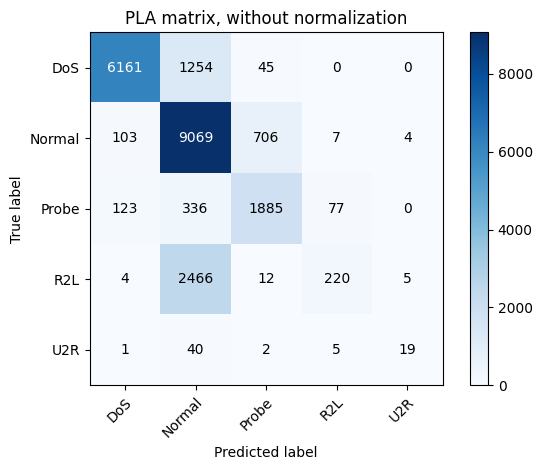

In [132]:
#PLA confusion matrix
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='PLA matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[6067 1378   15    0    0]
 [  87 9191  608    2    1]
 [ 167  594 1632   28    0]
 [   4 2686    3   14    0]
 [   0   65    0    0    2]]


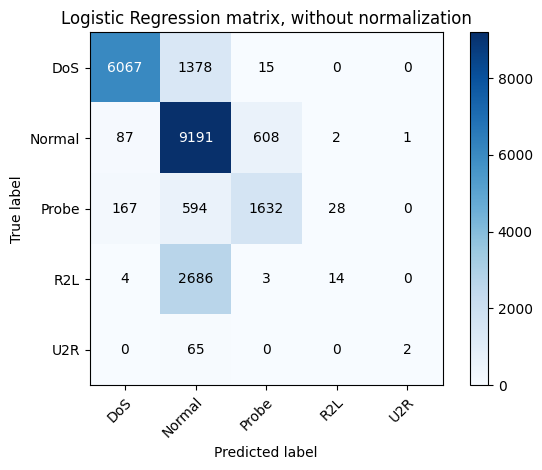

In [133]:
#Logistic Regression Matrix
classifier = LogisticRegression (solver='liblinear', multi_class='auto')
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Logistic Regression matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[5878 1552   29    1    0]
 [  59 9615  212    3    0]
 [ 178  659 1583    1    0]
 [   0 2576   89   42    0]
 [   1   64    0    2    0]]


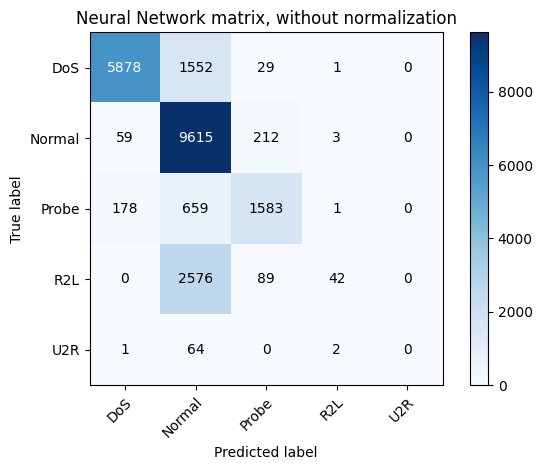

In [134]:
#NN confusion matrix
classifier = MLPClassifier (hidden_layer_sizes =(4,6,8))
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Neural Network matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[5952 1426   82    0    0]
 [  56 9531  297    3    2]
 [ 212  724 1485    0    0]
 [   8 2069  114  165  351]
 [   0   45    3    8   11]]


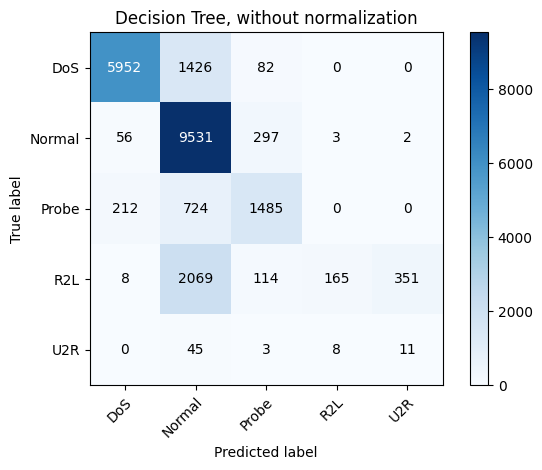

In [135]:
#Confusion Matrix for decision tree
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Decision Tree, without normalization')
plt.show()

Confusion matrix, without normalization
[[6256 1196    8    0    0]
 [  86 9195  607    1    0]
 [ 181  561 1653   26    0]
 [   4 2673    1   29    0]
 [   0   62    0    1    4]]


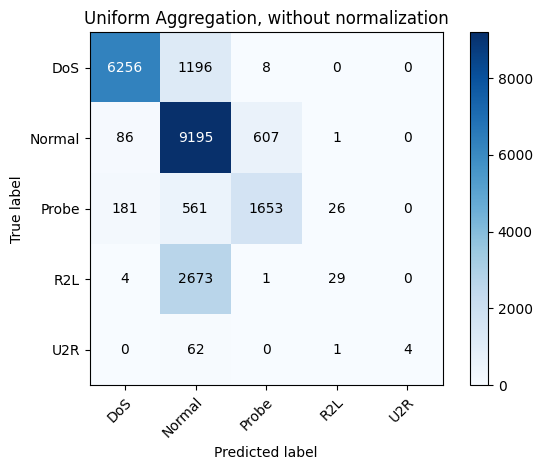

In [136]:
classifier = VotingClassifier(estimators=[('PLA', clf1), ('LR', clf2), ('NN', clf3),('Tree',clf4)], voting='hard')
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Uniform Aggregation, without normalization')
plt.show()

Confusion matrix, without normalization
[[6056 1390   14    0    0]
 [ 295 9198  393    1    2]
 [ 154  604 1565   98    0]
 [   4 2571    2  129    1]
 [   0   59    0    4    4]]


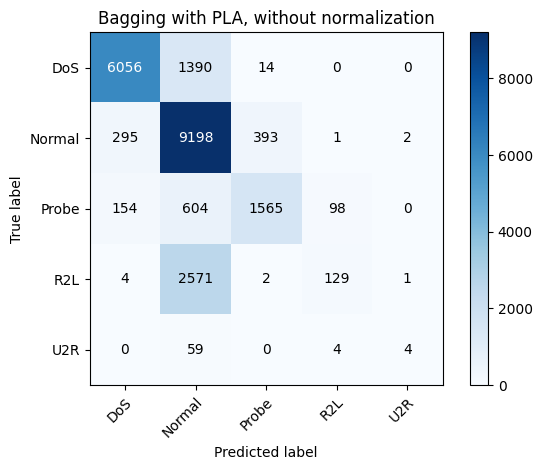

In [141]:
# Bagging with PLA confusion matrix
classifier = BaggingClassifier(estimator=PLA_clf)  # 🔥 بدل base_estimator بـ estimator
y_pred = classifier.fit(X_train, Y_train).predict(X_test)

plot_confusion_matrix(Y_test, y_pred, classes=class_names,
                      title='Bagging with PLA, without normalization')
plt.show()


Confusion matrix, without normalization
[[6020 1376   64    0    0]
 [  67 9629  193    0    0]
 [ 164  817 1440    0    0]
 [   0 2598    1  107    1]
 [   0   60    0    2    5]]


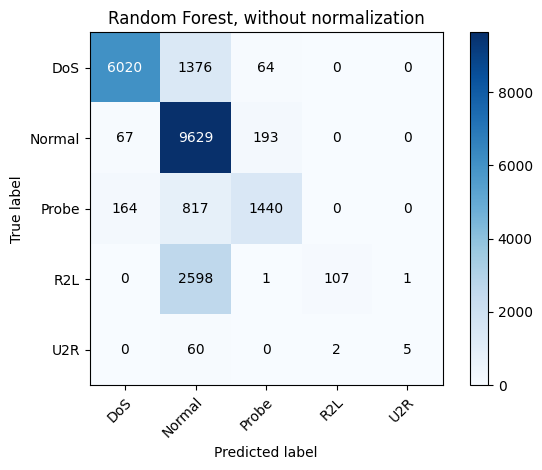

In [142]:
#Random Forest Confusion matrix

classifier = RandomForestClassifier()
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Random Forest, without normalization')
plt.savefig('RFCM')
plt.show()

In [144]:
import pickle

# Save données
with open("X_train.pkl", "wb") as f:
    pickle.dump(X_train, f)

with open("Y_train.pkl", "wb") as f:
    pickle.dump(Y_train, f)

print("✅ Données + Labels sauvegardés")


✅ Données + Labels sauvegardés


In [145]:
model.save("cnn_bilstm_ids.keras")
print("✅ modèle sauvegardé")


✅ modèle sauvegardé


In [146]:
import json

feature_order = list(combined_data_X.columns)  # نفس الداتا اللي بعثتها للموديل
mins = combined_data_X.min().to_dict()
maxs = combined_data_X.max().to_dict()

with open("feature_order.json","w") as f: json.dump(feature_order, f)
with open("minmax.json","w") as f: json.dump({"min": mins, "max": maxs}, f)

print("✅ preprocessing metadata sauvegardée")


✅ preprocessing metadata sauvegardée
